<h1> $y$ bias </h1>

Investigate the $y$ bias by reading the cluster not like a page but from top to bottom, then left to right.

In [25]:
import myfunctions as mf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit
import random

In [2]:
# load data
rootfile = uproot.open("./stage2_clusters.root")
event = rootfile["user202302;1"]
xMC = event["x_MC"].array(library="np") #[:40000]
yMC = event["y_MC"].array(library="np") #[:40000]
EMC = event["E_MC"].array(library="np") #[:40000]
x_truth = event["x_truth"].array(library="np") #[:40000]
y_truth = event["y_truth"].array(library="np") #[:40000]
E_truth = event["E_truth"].array(library="np") #[:40000]
x_fit = event["x_fit"].array(library="np") #[:40000]
y_fit = event["y_fit"].array(library="np") #[:40000]
E_fit = event["E_fit"].array(library="np") #[:40000]

In [3]:
clustersNxN, coord, ind_del = mf.form_cluster(xMC, yMC, EMC)

This took  159.68655610084534 s


In [4]:
clusters = clustersNxN.reshape((clustersNxN.shape[0], 25), order='F')
# cut data and from trainings and test data
xMC_train, xMC_veri, yMC_train, yMC_veri, EMC_train, EMC_veri, x_truth_train, x_truth_veri, y_truth_train, y_truth_veri, E_truth_train, E_truth_veri, x_fit_veri, y_fit_veri, E_fit_veri, clusters_t, clusters_v, coord_t, coord_v = mf.training_and_validation_data(xMC, yMC, EMC, x_truth, y_truth, E_truth, x_fit, y_fit, E_fit, ind_del, clusters, coord)
# prep data
training = mf.prep_trainingsdata(x_truth_train, y_truth_train, E_truth_train, coord_t)
veri_truth_data = mf.prep_trainingsdata(x_truth_veri, y_truth_veri, E_truth_veri, coord_v)
veri_fit_data = mf.prep_trainingsdata(x_fit_veri, y_fit_veri, E_fit_veri, coord_v)

In [5]:
# standardize input
clusters_t = mf.standardscore(clusters_t)
clusters_v = mf.standardscore(clusters_v)

In [6]:
model1 = keras.models.load_model('stage2model_corr_standardization')
model1.summary()
model1.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00001))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

In [7]:
model = keras.Sequential([layers.Input(shape=(25)),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model.summary()
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00001))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 9

In [8]:
a = time.time()
fit_hist = model.fit(clusters_t, training, batch_size=64, epochs=200, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/200
8482/8482 [==============================] - 7s 848us/step - loss: 551.5561 - val_loss: 29.7432
Epoch 2/200
8482/8482 [==============================] - 7s 836us/step - loss: 19.5885 - val_loss: 14.1237
Epoch 3/200
8482/8482 [==============================] - 7s 838us/step - loss: 13.5150 - val_loss: 12.1005
Epoch 4/200
8482/8482 [==============================] - 7s 838us/step - loss: 12.1156 - val_loss: 11.1838
Epoch 5/200
8482/8482 [==============================] - 7s 836us/step - loss: 11.4160 - val_loss: 10.6604
Epoch 6/200
8482/8482 [==============================] - 7s 837us/step - loss: 10.9752 - val_loss: 10.3153
Epoch 7/200
8482/8482 [==============================] - 7s 840us/step - loss: 10.6947 - val_loss: 10.0894
Epoch 8/200
8482/8482 [==============================] - 7s 842us/step - loss: 10.4974 - val_loss: 9.9451
Epoch 9/200
8482/8482 [==============================] - 7s 838us/step - loss: 10.3563 - val_loss: 9.8365
Epoch 10/200
8482/8482 [==============

Epoch 155/200
8482/8482 [==============================] - 7s 839us/step - loss: 9.0741 - val_loss: 8.6939
Epoch 156/200
8482/8482 [==============================] - 7s 835us/step - loss: 9.0686 - val_loss: 8.7012
Epoch 157/200
8482/8482 [==============================] - 7s 857us/step - loss: 9.0675 - val_loss: 8.7173
Epoch 158/200
8482/8482 [==============================] - 7s 850us/step - loss: 9.0675 - val_loss: 8.6990
Epoch 159/200
8482/8482 [==============================] - 7s 836us/step - loss: 9.0634 - val_loss: 8.6772
Epoch 160/200
8482/8482 [==============================] - 7s 834us/step - loss: 9.0590 - val_loss: 8.6903
Epoch 161/200
8482/8482 [==============================] - 7s 840us/step - loss: 9.0562 - val_loss: 8.7163
Epoch 162/200
8482/8482 [==============================] - 7s 836us/step - loss: 9.0538 - val_loss: 8.6839
Epoch 163/200
8482/8482 [==============================] - 7s 836us/step - loss: 9.0521 - val_loss: 8.7008
Epoch 164/200
8482/8482 [============

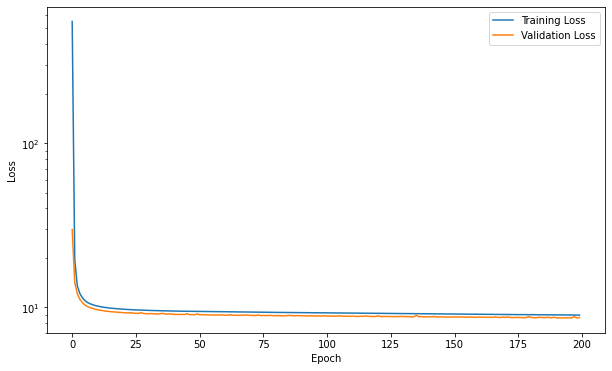

In [9]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist)

In [10]:
output = model.predict(clusters_v)

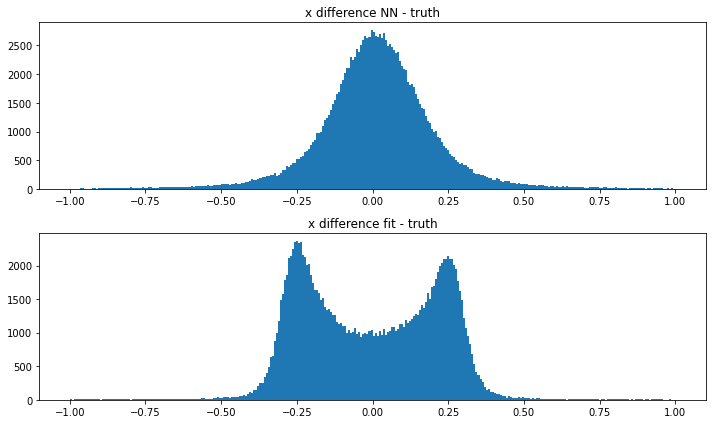

In [11]:
mf.histo_output(output.T[0], veri_fit_data.T[0], veri_truth_data.T[0], name="x", fit=False)

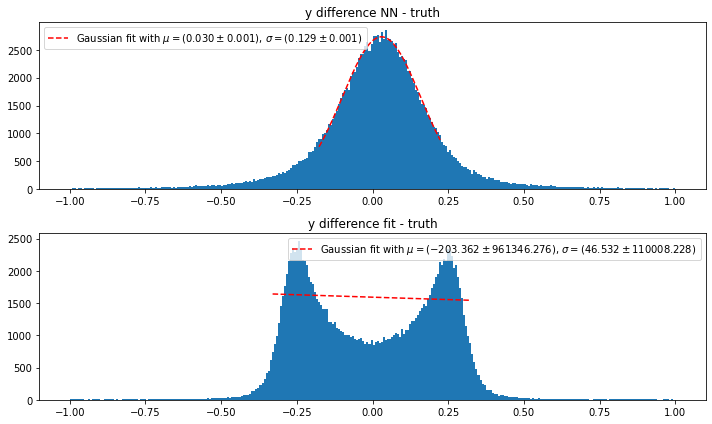

(array([2.95213193e-02, 1.28974980e-01, 8.83610120e+02]),
 array([8.18362516e-04, 1.09770663e-03, 6.03491865e+00]),
 array([-2.03362422e+02,  4.65324619e+01,  2.60668143e+09]),
 array([9.61346276e+05, 1.10008228e+05, 1.23371768e+14]))

In [12]:
mf.histo_output(output.T[1], veri_fit_data.T[1], veri_truth_data.T[1], name="y")

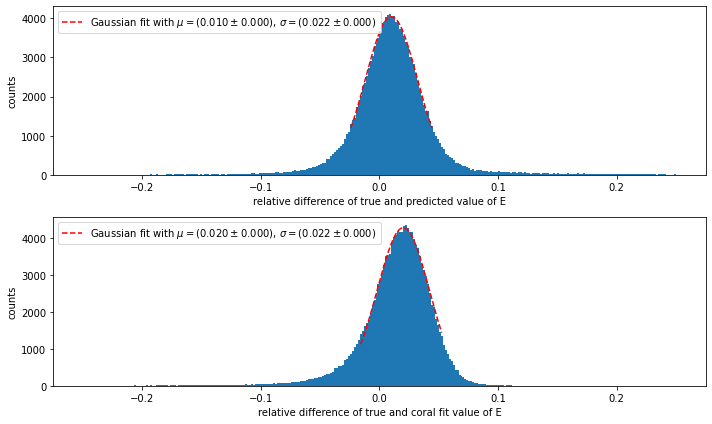

array([22.394573 , 84.28732  ,  5.2738304, ..., 30.12973  , 10.075263 ,
        8.167223 ], dtype=float32)

In [13]:
mf.histo_output_rel(output.T[2], veri_fit_data.T[2], veri_truth_data.T[2], name="E", range_x=(-0.25,0.25), fit=True)

And now look at the bias...

In [17]:
def gaus(x, mu, sigma, A):
    return (A/np.sqrt(2*np.pi * sigma**2))* np.exp(-(x-mu)**2 / (2*sigma**2))

In [14]:
def histo_output_crosscheck(xy_NN, xy_truth, E_truth, name='', range_x = (-0.25,0.25), bins=300, num_sig=1):
    '''similar to histo_output but written for E to show how well NN works for differnet energies. Display relative difference and return values that are more than "num_sig" times sigma away'''
    
    plt.rcParams["figure.figsize"] = (10,6)
    plt.subplot(1,1,1)
    n_counts, bins, patches = plt.hist((xy_NN-xy_truth)/xy_truth, bins=bins, range=range_x)
    
    # fit
    maxv = n_counts.max()
    ind_fit = np.where(n_counts > 0.3*maxv)
    liml = ind_fit[0].min()
    limu = ind_fit[0].max() + 1

    x_centers = 0.5*(bins[:-1]+bins[1:])
    popt1, pcov1 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu], maxfev=10000)
    perr1 = np.sqrt(np.diag(pcov1))
    x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
    y_fit = gaus(x_fit, *popt1)
    plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.3f} \pm {:.3f})$".format(popt1[0], perr1[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt1[1], perr1[1]))
    plt.legend()
    plt.xlabel("relative difference of true and predicted value of " + name)
    plt.ylabel("counts")

    # which values does NN not learn correctly (energy)?
    ind_bad = np.where(abs((xy_NN-xy_truth)/xy_truth) > num_sig * popt1[1]) # all events further away than 1 sigma
    values_bad_xy = xy_truth[ind_bad]
    E_bad = E_truth[ind_bad]
    
    plt.tight_layout()
    plt.show()
    
    return values_bad_xy, E_bad # return values that are more than 1 (num_sig) sigma away

In [15]:
def histo_output_E(arr_NN, arr_truth, range_x=(-0.25,0.25), bins=300):
    
    plt.rcParams["figure.figsize"] = (10,6)
    plt.subplot(2,1,1)
    n_counts, bins, patches = plt.hist((arr_NN-arr_truth)/arr_truth, bins=bins, range=range_x)

    maxv = n_counts.max()
    ind_fit = np.where(n_counts > 0.3*maxv)
    liml = ind_fit[0].min()
    limu = ind_fit[0].max() + 1

    x_centers = 0.5*(bins[:-1]+bins[1:])
    popt1, pcov1 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu], maxfev=10000)
    perr1 = np.sqrt(np.diag(pcov1))
    x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
    y_fit = gaus(x_fit, *popt1)
    plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.3f} \pm {:.3f})$".format(popt1[0], perr1[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt1[1], perr1[1]))
    plt.legend()
    plt.xlabel("relative difference of true and predicted value of E")
    plt.ylabel("counts")

    # which values does NN not learn correctly (energy)?
    ind_bad = np.where(abs((arr_NN-arr_truth)/arr_truth) > popt1[1]) # all events further away than 1 sigma
    values_bad = arr_truth[ind_bad]
    
    plt.tight_layout()
    plt.show()
    return values_bad

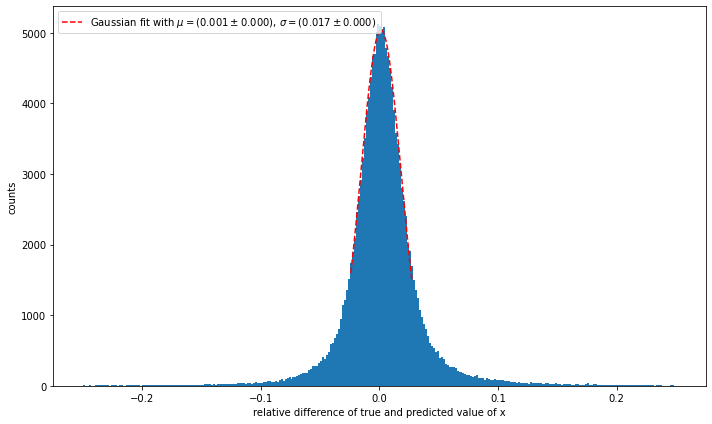

In [18]:
x_bad, Ex_bad = histo_output_crosscheck(output.T[0], veri_truth_data.T[0], veri_truth_data.T[2], name="x")

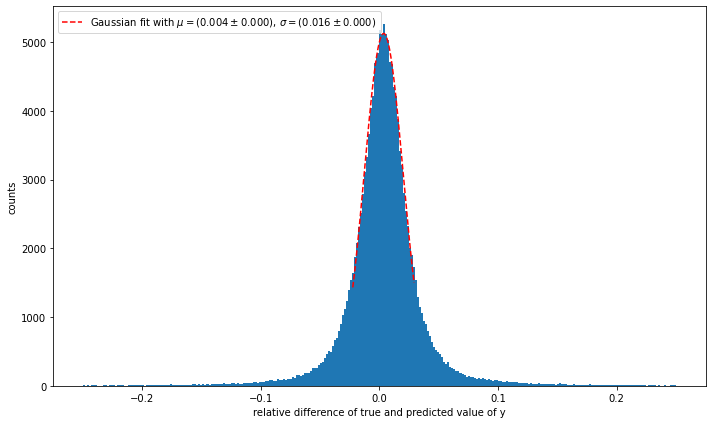

In [19]:
y_bad, Ey_bad = histo_output_crosscheck(output.T[1], veri_truth_data.T[1], veri_truth_data.T[2], name="y")

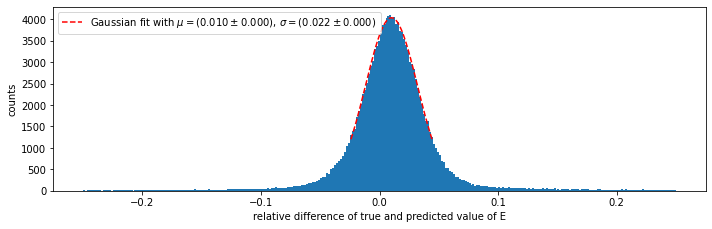

In [20]:
E_values_bad = histo_output_E(output.T[2], veri_truth_data.T[2])

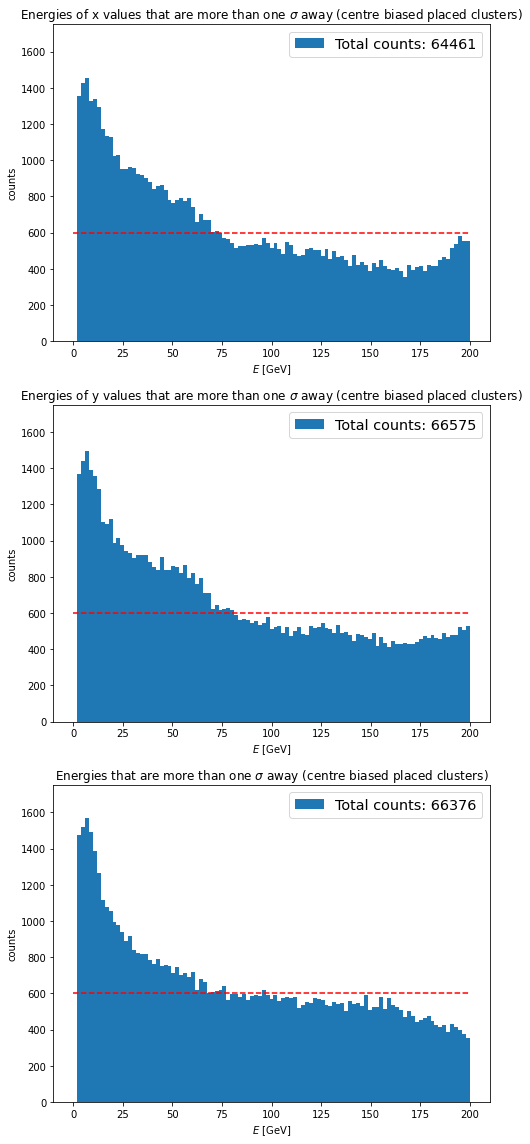

In [23]:
plt.rcParams["figure.figsize"] = (7,16)

ylim = 1750

plt.subplot(3,1,1)
plt.hist(Ex_bad, bins=100, label="Total counts: "+ str(len(Ex_bad)))
plt.legend(fontsize="x-large")
plt.title("Energies of x values that are more than one $\sigma$ away (centre biased placed clusters)")
plt.xlabel("$E$ [GeV]")
plt.ylabel("counts")
plt.hlines(600, 0, 200, 'r', linestyles="dashed")
plt.ylim(0, ylim)

plt.subplot(3,1,2)
plt.hist(Ey_bad, bins=100, label="Total counts: "+ str(len(Ey_bad)))
plt.legend(fontsize="x-large")
plt.title("Energies of y values that are more than one $\sigma$ away (centre biased placed clusters)")
plt.xlabel("$E$ [GeV]")
plt.ylabel("counts")
plt.hlines(600, 0, 200, 'r', linestyles="dashed")
plt.ylim(0, ylim)

plt.subplot(3,1,3)
plt.hist(E_values_bad, bins=100, label="Total counts: "+ str(len(E_values_bad)))
plt.legend(fontsize="x-large")
plt.title("Energies that are more than one $\sigma$ away (centre biased placed clusters)")
plt.xlabel("$E$ [GeV]")
plt.ylabel("counts")
plt.hlines(600, 0, 200, 'r', linestyles="dashed")
plt.ylim(0, ylim)


plt.tight_layout()
plt.show()

<h2> Let's try to go crazy 

In [33]:
mask = np.arange(25)
random.shuffle(mask)
print(mask) #[21  4 18  9 10 12 13  6  0 22 14  2 24  7 16 20 11  5  3  1 17 15 19  8 23]

[21  4 18  9 10 12 13  6  0 22 14  2 24  7 16 20 11  5  3  1 17 15 19  8
 23]


In [35]:
clusters = clustersNxN.reshape((clustersNxN.shape[0], 25))
clusters = clusters[:, mask]
# cut data and from trainings and test data
xMC_train, xMC_veri, yMC_train, yMC_veri, EMC_train, EMC_veri, x_truth_train, x_truth_veri, y_truth_train, y_truth_veri, E_truth_train, E_truth_veri, x_fit_veri, y_fit_veri, E_fit_veri, clusters_t, clusters_v, coord_t, coord_v = mf.training_and_validation_data(xMC, yMC, EMC, x_truth, y_truth, E_truth, x_fit, y_fit, E_fit, ind_del, clusters, coord)
# prep data
training = mf.prep_trainingsdata(x_truth_train, y_truth_train, E_truth_train, coord_t)
veri_truth_data = mf.prep_trainingsdata(x_truth_veri, y_truth_veri, E_truth_veri, coord_v)
veri_fit_data = mf.prep_trainingsdata(x_fit_veri, y_fit_veri, E_fit_veri, coord_v)

In [36]:
# standardize input
clusters_t = mf.standardscore(clusters_t)
clusters_v = mf.standardscore(clusters_v)

In [37]:
model2 = keras.Sequential([layers.Input(shape=(25)),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model2.summary()
model2.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00001))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 3)                

In [38]:
a = time.time()
fit_hist2 = model2.fit(clusters_t, training, batch_size=64, epochs=200, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/200
8482/8482 [==============================] - 8s 875us/step - loss: 503.7073 - val_loss: 29.1667
Epoch 2/200
8482/8482 [==============================] - 7s 837us/step - loss: 19.5478 - val_loss: 13.1199
Epoch 3/200
8482/8482 [==============================] - 7s 843us/step - loss: 12.6145 - val_loss: 11.4343
Epoch 4/200
8482/8482 [==============================] - 7s 842us/step - loss: 11.5331 - val_loss: 10.7161
Epoch 5/200
8482/8482 [==============================] - 7s 842us/step - loss: 10.9763 - val_loss: 10.3389
Epoch 6/200
8482/8482 [==============================] - 7s 840us/step - loss: 10.6145 - val_loss: 10.0516
Epoch 7/200
8482/8482 [==============================] - 7s 845us/step - loss: 10.3740 - val_loss: 9.8635
Epoch 8/200
8482/8482 [==============================] - 7s 849us/step - loss: 10.2134 - val_loss: 9.7057
Epoch 9/200
8482/8482 [==============================] - 7s 871us/step - loss: 10.0962 - val_loss: 9.5710
Epoch 10/200
8482/8482 [===============

Epoch 155/200
8482/8482 [==============================] - 7s 870us/step - loss: 9.0884 - val_loss: 8.6702
Epoch 156/200
8482/8482 [==============================] - 7s 871us/step - loss: 9.0837 - val_loss: 8.6685
Epoch 157/200
8482/8482 [==============================] - 7s 842us/step - loss: 9.0825 - val_loss: 8.6881
Epoch 158/200
8482/8482 [==============================] - 7s 841us/step - loss: 9.0816 - val_loss: 8.7786
Epoch 159/200
8482/8482 [==============================] - 7s 841us/step - loss: 9.0792 - val_loss: 8.7180
Epoch 160/200
8482/8482 [==============================] - 7s 843us/step - loss: 9.0764 - val_loss: 8.6953
Epoch 161/200
8482/8482 [==============================] - 7s 843us/step - loss: 9.0767 - val_loss: 8.6713
Epoch 162/200
8482/8482 [==============================] - 7s 842us/step - loss: 9.0741 - val_loss: 8.6519
Epoch 163/200
8482/8482 [==============================] - 7s 837us/step - loss: 9.0722 - val_loss: 8.6696
Epoch 164/200
8482/8482 [============

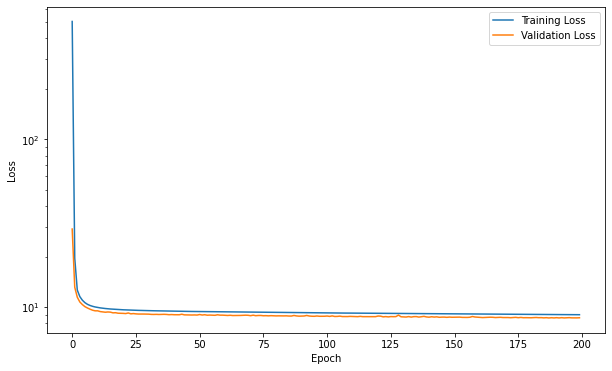

In [39]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist2)

In [40]:
output2 = model2.predict(clusters_v)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

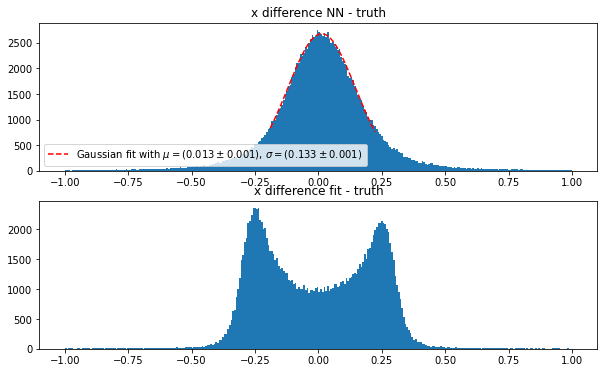

In [48]:
mf.histo_output(output.T[0], veri_fit_data.T[0], veri_truth_data.T[0], name="x", fit=True)

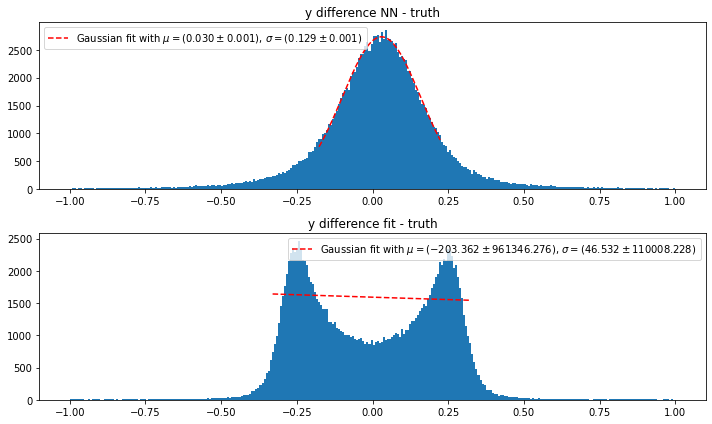

(array([2.95213193e-02, 1.28974980e-01, 8.83610120e+02]),
 array([8.18362516e-04, 1.09770663e-03, 6.03491865e+00]),
 array([-2.03362422e+02,  4.65324619e+01,  2.60668143e+09]),
 array([9.61346276e+05, 1.10008228e+05, 1.23371768e+14]))

In [42]:
mf.histo_output(output.T[1], veri_fit_data.T[1], veri_truth_data.T[1], name="y")

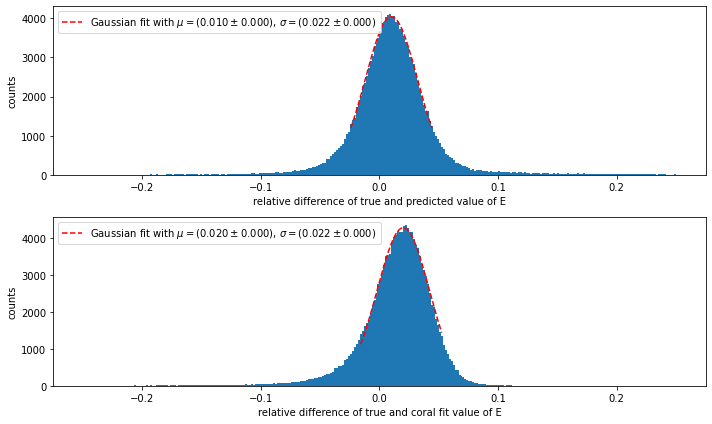

array([22.394573 , 84.28732  ,  5.2738304, ..., 30.12973  , 10.075263 ,
        8.167223 ], dtype=float32)

In [43]:
mf.histo_output_rel(output.T[2], veri_fit_data.T[2], veri_truth_data.T[2], name="E", range_x=(-0.25,0.25), fit=True)

Again look at the bias:

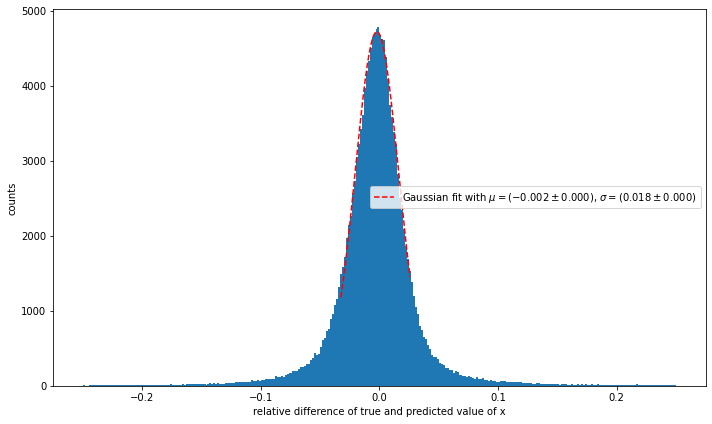

In [44]:
x_bad2, Ex_bad2 = histo_output_crosscheck(output2.T[0], veri_truth_data.T[0], veri_truth_data.T[2], name="x")

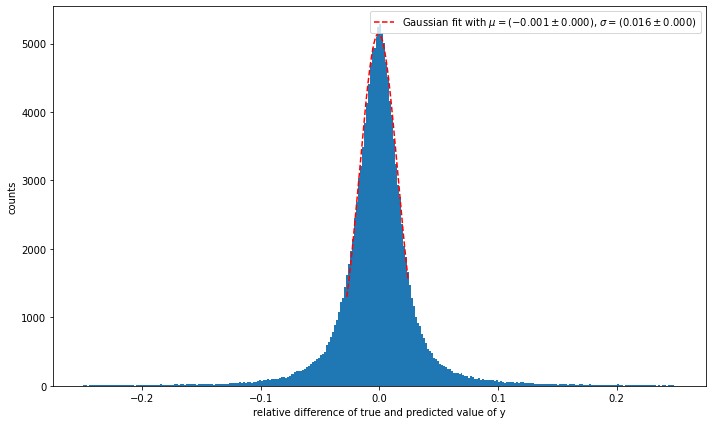

In [45]:
y_bad2, Ey_bad2 = histo_output_crosscheck(output2.T[1], veri_truth_data.T[1], veri_truth_data.T[2], name="y")

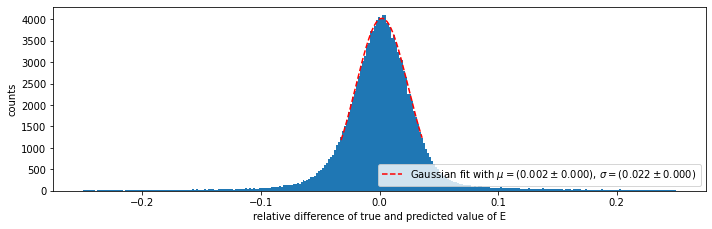

In [46]:
E_values_bad2 = histo_output_E(output2.T[2], veri_truth_data.T[2])

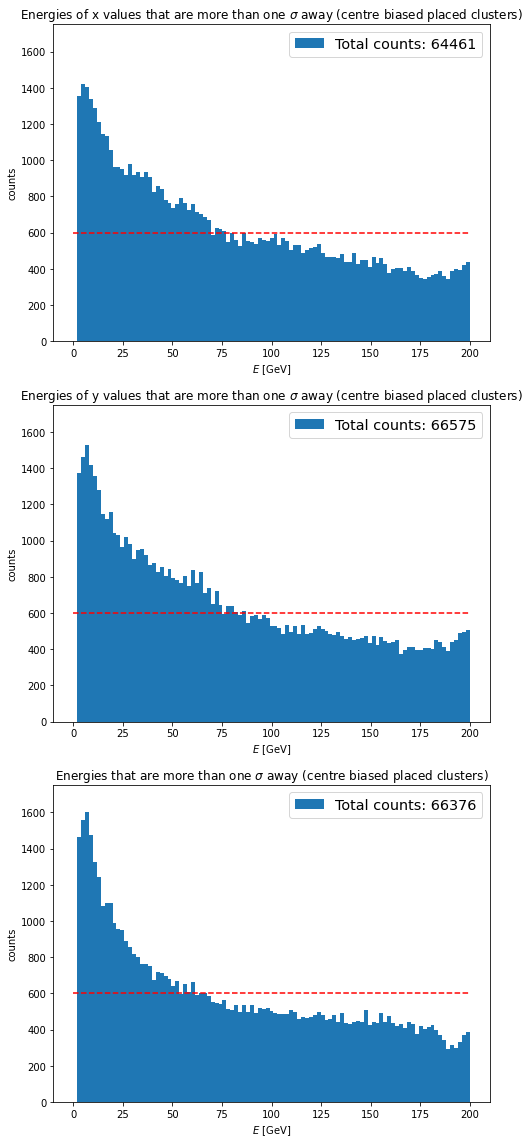

In [47]:
plt.rcParams["figure.figsize"] = (7,16)

ylim = 1750

plt.subplot(3,1,1)
plt.hist(Ex_bad2, bins=100, label="Total counts: "+ str(len(Ex_bad)))
plt.legend(fontsize="x-large")
plt.title("Energies of x values that are more than one $\sigma$ away (centre biased placed clusters)")
plt.xlabel("$E$ [GeV]")
plt.ylabel("counts")
plt.hlines(600, 0, 200, 'r', linestyles="dashed")
plt.ylim(0, ylim)

plt.subplot(3,1,2)
plt.hist(Ey_bad2, bins=100, label="Total counts: "+ str(len(Ey_bad)))
plt.legend(fontsize="x-large")
plt.title("Energies of y values that are more than one $\sigma$ away (centre biased placed clusters)")
plt.xlabel("$E$ [GeV]")
plt.ylabel("counts")
plt.hlines(600, 0, 200, 'r', linestyles="dashed")
plt.ylim(0, ylim)

plt.subplot(3,1,3)
plt.hist(E_values_bad2, bins=100, label="Total counts: "+ str(len(E_values_bad)))
plt.legend(fontsize="x-large")
plt.title("Energies that are more than one $\sigma$ away (centre biased placed clusters)")
plt.xlabel("$E$ [GeV]")
plt.ylabel("counts")
plt.hlines(600, 0, 200, 'r', linestyles="dashed")
plt.ylim(0, ylim)


plt.tight_layout()
plt.show()

One can see that the bias in x and y is now removed but equal for both dimensions.

Let's compare the precision and resolution: 

| (x/y/rel E) | $\mu$ | $\sigma$ |
| --- | --- | --- |
| stage2 simplest model |0.021 / 0.058 / 0.005 | 0.123 / 0.125 / 0.022|
| stage2 input with random cell order | 0.013 / 0.030 / 0.010 | 0.133 / 0.129 / 0.022 |

While the bias in x and y is removed, the precision in the energy is worse! But this is propably the more important information...

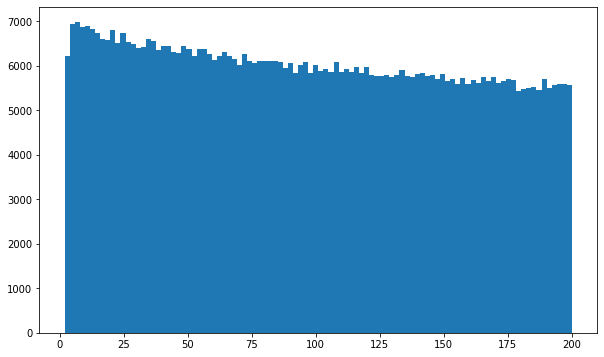

In [53]:
plt.hist(training.T[2], bins=100)
plt.show()

The dip in the energy is weird... but the energies that are distributed equally!